In [ ]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

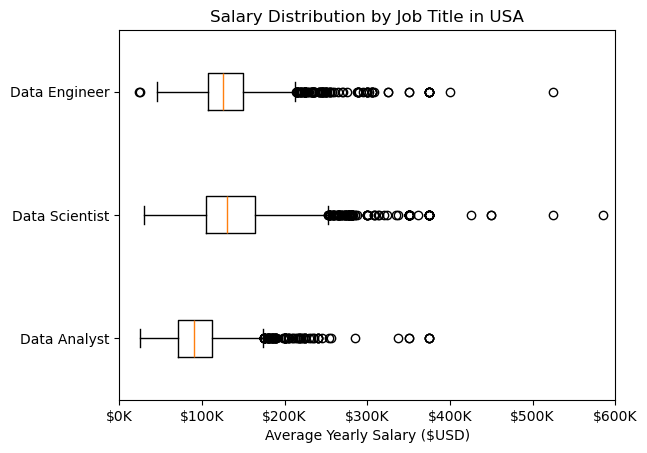

In [ ]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_USA = df[(df['job_country'] == 'United States') & (df['job_title_short'].isin(job_titles))].copy()
df_USA = df_USA.dropna(subset=['salary_year_avg'])
df_USA['job_title_short'].value_counts()

job_list = [df_USA[df_USA['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles,vert=False)
plt.title("Salary Distribution by Job Title in USA")
plt.xlabel("Average Yearly Salary ($USD)")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()